In [111]:
import pandas as pd
import requests
import os

In [112]:
app_id = os.environ["MP1_APP_ID"]
app_key = os.environ["MP1_APP_KEY"]
url_append = f'?app_id={app_id}&app_key={app_key}' 

In [113]:
url_bus_ha = "https://api.tfl.gov.uk/Journey/JourneyResults/51.4700%2C%20-0.4543/to/51.5101%2C%20-0.1205?mode=bus"
url_tube_ha = "https://api.tfl.gov.uk/Journey/JourneyResults/51.4700%2C%20-0.4543/to/51.5101%2C%20-0.1205?mode=tube"

In [114]:
response_bus_ha = requests.get(url_bus_ha)
response_tube_ha = requests.get(url_tube_ha)

In [115]:
bus_journey_ha = response_bus_ha.json()
tube_journey_ha = response_tube_ha.json()

In [140]:
data = pd.DataFrame(columns=['Mode', 'ETA_Minutes', 'Origin', 'Origin_ll', 'Destination', 'Destination_ll'])
data

,Mode,ETA_Minutes,Origin,Origin_ll,Destination,Destination_ll


In [141]:
bus_list_ha = bus_journey_ha['journeys']                                              
bus_duration_ha_list = []                                                    

for bus_option in bus_list_ha:                                                  
    bus_duration = bus_option['duration']                                    
    int_bus_duration = int(bus_duration)                                        
    bus_duration_ha_list.append(int_bus_duration)                                

average_bus_duration = round(sum(bus_duration_ha_list) / len(bus_duration_ha_list))  

bus_ha = pd.DataFrame([{'Mode':'Bus', 'ETA_Minutes':average_bus_duration, 'Origin':'Heathrow Airport', 'Origin_ll': '51.4700,0.4543', 'Destination': 'Savoy Hotel', 'Destination_ll':"51.5101,0.1205"}])
data = pd.concat([data, bus_ha], axis=0)

tube_list_ha = tube_journey_ha['journeys']                                            
tube_duration_ha_list = []                                                         

for tube_option in tube_list_ha:                                               
    tube_duration = tube_option['duration']                                    
    int_tube_duration = int(tube_duration)                                      
    tube_duration_ha_list.append(int_tube_duration)                                

average_tube_duration = round(sum(tube_duration_ha_list) / len(tube_duration_ha_list))

tube_ha = pd.DataFrame([{'Mode':'Tube', 'ETA_Minutes':average_tube_duration, 'Origin':'Heathrow Airport', 'Origin_ll': '51.4700,0.4543', 'Destination': 'Savoy Hotel', 'Destination_ll':"51.5101,0.1205"}])
data = pd.concat([data, tube_ha], axis=0)

In [137]:
data

,Mode,ETA_Minutes,Origin,Origin_ll,Destination,Destination_ll
0,Bus,99,Heathrow Airport,"51.4700,0.4543",Savoy Hotel,"51.5101,0.1205"
0,Tube,154,Heathrow Airport,"51.4700,0.4543",Savoy Hotel,"51.5101,0.1205"


In [119]:
url_bus_sh = "https://api.tfl.gov.uk/Journey/JourneyResults/51.5101%2C%20-0.1205/to/51.5055%2C%20-0.0754?mode=bus"
url_tube_sh = "https://api.tfl.gov.uk/Journey/JourneyResults/51.5101%2C%20-0.1205/to/51.5055%2C%20-0.0754?mode=tube"
url_walk_sh = "https://api.tfl.gov.uk/Journey/JourneyResults/51.5101%2C%20-0.1205/to/51.5055%2C%20-0.0754?mode=walking"
url_coach_sh = "https://api.tfl.gov.uk/Journey/JourneyResults/51.5101%2C%20-0.1205/to/51.5055%2C%20-0.0754?mode=coach"

In [120]:
response_bus_sh = requests.get(url_bus_sh)
response_tube_sh = requests.get(url_tube_sh)
response_walk_sh = requests.get(url_walk_sh)
response_coach_sh = requests.get(url_coach_sh)

In [121]:
bus_journey_sh = response_bus_sh.json()
tube_journey_sh = response_tube_sh.json()
walk_journey_sh = response_walk_sh.json()
coach_journey_sh = response_coach_sh.json()

In [142]:
bus_list_sh = bus_journey_sh['journeys']                                            
bus_duration_sh_list = []                                                         

for bus_option in bus_list_sh:                                               
    bus_duration = bus_option['duration']                                    
    int_bus_duration = int(bus_duration)                                      
    bus_duration_sh_list.append(int_bus_duration)                                

average_bus_duration = round(sum(bus_duration_sh_list) / len(bus_duration_sh_list))

bus_sh = pd.DataFrame([{'Mode':'Bus', 'ETA_Minutes':average_bus_duration, 'Origin':'Savoy Hotel', 'Origin_ll': '51.5101,0.1205', 'Destination': 'Tower Bridge', 'Destination_ll':"51.5055,0.0754"}])
data = pd.concat([data, bus_sh], axis=0)

tube_list_sh = tube_journey_sh['journeys']                                            
tube_duration_sh_list = []                                                         

for tube_option in tube_list_sh:                                               
    tube_duration = tube_option['duration']                                    
    int_tube_duration = int(tube_duration)                                      
    tube_duration_sh_list.append(int_tube_duration)                                

average_tube_duration = round(sum(tube_duration_sh_list) / len(tube_duration_sh_list))

tube_sh = pd.DataFrame([{'Mode':'Tube', 'ETA_Minutes':average_tube_duration, 'Origin':'Savoy Hotel', 'Origin_ll': '51.5101,0.1205', 'Destination': 'Tower Bridge', 'Destination_ll':"51.5055,0.0754"}])
data = pd.concat([data, tube_sh], axis=0)

walk_list_sh = walk_journey_sh['journeys']                                            
walk_duration_sh_list = []                                                         

for walk_option in walk_list_sh:                                               
    walk_duration = walk_option['duration']                                    
    int_walk_duration = int(walk_duration)                                      
    walk_duration_sh_list.append(int_walk_duration)                                

average_walk_duration = round(sum(walk_duration_sh_list) / len(walk_duration_sh_list))

walk_sh = pd.DataFrame([{'Mode':'Walking', 'ETA_Minutes':average_walk_duration, 'Origin':'Savoy Hotel', 'Origin_ll': '51.5101,0.1205', 'Destination': 'Tower Bridge', 'Destination_ll':"51.5055,0.0754"}])
data = pd.concat([data, walk_sh], axis=0)

coach_list_sh = coach_journey_sh['journeys']                                            
coach_duration_sh_list = []                                                         

for coach_option in coach_list_sh:                                               
    coach_duration = coach_option['duration']                                    
    int_coach_duration = int(coach_duration)                                      
    coach_duration_sh_list.append(int_coach_duration)                                

average_coach_duration = round(sum(coach_duration_sh_list) / len(coach_duration_sh_list))

coach_sh = pd.DataFrame([{'Mode':'Coach', 'ETA_Minutes':average_bus_duration, 'Origin':'Savoy Hotel', 'Origin_ll': '51.5101,0.1205', 'Destination': 'Tower Bridge', 'Destination_ll':"51.5055,0.0754"}])
data = pd.concat([data, coach_sh], axis=0)

In [143]:
data

,Mode,ETA_Minutes,Origin,Origin_ll,Destination,Destination_ll
0,Bus,99,Heathrow Airport,"51.4700,0.4543",Savoy Hotel,"51.5101,0.1205"
0,Tube,154,Heathrow Airport,"51.4700,0.4543",Savoy Hotel,"51.5101,0.1205"
0,Bus,32,Savoy Hotel,"51.5101,0.1205",Tower Bridge,"51.5055,0.0754"
0,Tube,34,Savoy Hotel,"51.5101,0.1205",Tower Bridge,"51.5055,0.0754"
0,Walking,53,Savoy Hotel,"51.5101,0.1205",Tower Bridge,"51.5055,0.0754"
0,Coach,32,Savoy Hotel,"51.5101,0.1205",Tower Bridge,"51.5055,0.0754"


In [ ]:
data.

In [130]:
df = pd.DataFrame(columns=['Longitude', 'Latitude'])
heathrow = pd.DataFrame([{'Longitude':51.4700, 'Latitude':0.1205}])
df = pd.concat([df, heathrow], axis=0)
savoy = pd.DataFrame([{'Longitude':51.5101, 'Latitude':0.4543}])
df = pd.concat([df, heathrow], axis=0)
savoy = pd.DataFrame([{'Longitude':51.5055, 'Latitude':0.0754}])
df = pd.concat([df, heathrow], axis=0)

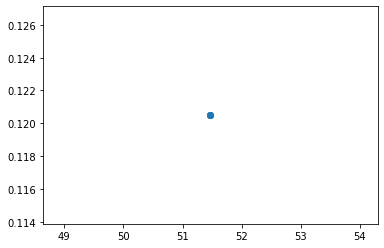

In [133]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

<AxesSubplot:>

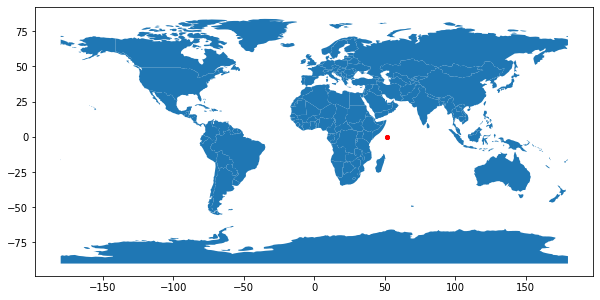

In [134]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)